# Dataproject: students ability to afford housing. 

In this project, we will look at students ability to afford housing compared to the total population. To do so we will import data from Statistics Denmark (DST) on income by socioeconomic status and consumption by dwelling type.

**Imports and set magics:**

In [ ]:
# The DST API wrapper (if not already installed)
#%pip install git+https://github.com/alemartinello/dstapi

import pandas as pd
import numpy as np
import datetime
from dstapi import DstApi

#imports for graphs
import matplotlib.pyplot as plt
import ipywidgets as widgets
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
#import dataproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1) <a id='toc1_2_'></a>[Import and read data](#toc0_)

First, we import the two datasets we will be using from DTS and summarise them to get a general idea of their setup and content.

In [ ]:
#importing consumption and income data
rent = DstApi('FU06') #consumption data including housing rent costs
inc = DstApi('INDKP104') #disposable income by socioeconmic status

#overview of variables and the corresponding available values for the two datasets
df = [rent, inc]

for x in df:
    tabsum_x = x.tablesummary(language='en')
    display(tabsum_x)  
    
    for variable in tabsum_x['variable name']:
        print(variable+':')
        display(x.variable_levels(variable, language='en'))


Table FU06: Consumption by group of consumption, type of dwelling, price unit and time
Last update: 2023-12-19T08:00:00


,variable name,# values,First value,First value label,Last value,Last value label,Time variable
0,KONSUMGRP,47,1000,CONSUMPTION TOTAL,127000,12.7 Other services n.e.c.,False
1,BOLFORM,7,2001,Average Households,5060,Rented room,False
2,PRISENHED,2,AARPRIS,Current prices,08PRIS,Real prices,False
3,Tid,29,1994,1994,2022,2022,True


KONSUMGRP:


,id,text
0,1000,CONSUMPTION TOTAL
1,011000,01.1 Food
2,012000,01.2 Non-alcoholic beverages
3,021000,02.1 Alcoholic beverages
4,022000,02.2 Tobacco
5,023000,02.3 Narcotics
6,031000,03.1 Clothing
7,032000,03.2 Footwear
8,041000,04.1 Actual rentals for housing
9,042000,04.2 Imputed rentals for housing


BOLFORM:


,id,text
0,2001,Average Households
1,5010,Owner-occupied detached house
2,5020,Owner-occupied flat
3,5030,Rented detached house
4,5040,Rented flat
5,5050,Flat in housing cooperative
6,5060,Rented room


PRISENHED:


,id,text
0,AARPRIS,Current prices
1,08PRIS,Real prices


Tid:


,id,text
0,1994,1994
1,1995,1995
2,1996,1996
3,1997,1997
4,1998,1998
5,1999,1999
6,2000,2000
7,2001,2001
8,2002,2002
9,2003,2003


Table INDKP104: Income, persons by part of the country, unit, sex, socioeconomic status, type of income and time
Last update: 2023-11-27T08:00:00


,variable name,# values,First value,First value label,Last value,Last value label,Time variable
0,LANDDEL,12,000,All Denmark,11,Province Nordjylland,False
1,ENHED,4,101,People with type of income (number),121,Average income for people with type of income ...,False
2,KOEN,3,MOK,"Men and women, total",K,Women,False
3,SOCIO,19,100,Total,410,Other persons not economically active,False
4,INDKOMSTTYPE,39,100,1 Disposable income (2+30-31-32-35),290,Taxable income,False
5,Tid,29,1994,1994,2022,2022,True


LANDDEL:


,id,text
0,000,All Denmark
1,01,Province Byen København
2,02,Province Københavns omegn
3,03,Province Nordsjælland
4,04,Province Bornholm
5,05,Province Østsjælland
6,06,Province Vest- og Sydsjælland
7,07,Province Fyn
8,08,Province Sydjylland
9,09,Province Østjylland


ENHED:


,id,text
0,101,People with type of income (number)
1,110,Amount of income (DKK 1.000)
2,116,Average income for all people (DKK)
3,121,Average income for people with type of income ...


KOEN:


,id,text
0,MOK,"Men and women, total"
1,M,Men
2,K,Women


SOCIO:


,id,text
0,100,Total
1,110,"Self-employed, total incl. Assisting spouses"
2,114,Self-employed without employees
3,115,Self-employed with employees
4,130,"Employees, total"
5,131,"Employees, managers"
6,132,"Employees, higher level"
7,133,"Employees, medium level"
8,134,"Employees, basic level"
9,135,Other employees


INDKOMSTTYPE:


,id,text
0,100,1 Disposable income (2+30-31-32-35)
1,105,"2 Pre-tax Income, total (3+7+22+26+29)"
2,110,3 Primary income (4+5+6)
3,115,"4 Wages and salaries etc., total"
4,120,"5 Entrepreneurial income, total"
5,125,6 Received fees subject to labour market contr...
6,130,7 Public transfer incomes(8+14+19)
7,135,8 Unemployment and cash benefits (9+10+11+12+13)
8,140,9 Unemployment benefits
9,145,10 Other benefits from unemployment funds


Tid:


,id,text
0,1994,1994
1,1995,1995
2,1996,1996
3,1997,1997
4,1998,1998
5,1999,1999
6,2000,2000
7,2001,2001
8,2002,2002
9,2003,2003


Now, we can define a parameter dictionary specifing the values we want to keep and use those specification to load the data. For the consumption data, we are only interested in extracting the actual rent paid for rented appartments (assuming that students primarily rents and live in this type of dwelling). For the income dataset, we are only interested in extracting the disposable income for students and for the entire population. For both datasets we generalise the analysis by looking at all of denmark.

In [ ]:
#keep values of interest for consumption data
params_rent = rent._define_base_params(language='en')

rent_var = params_rent['variables'] # Returns a view, that we can edit
rent_var[0]['values'] = ['041000'] #keep actual housing rent
rent_var[1]['values'] =['5040'] #keep rented flats
rent_var[2]['values'] = ['AARPRIS'] #keep current prices

#load the data specified in the param dictionary 
rent_api = rent.get_data(params=params_rent)
rent_api.sort_values(by= ['TID'], inplace=True) #sort for easier inspection
rent_api.head(5)


,KONSUMGRP,BOLFORM,PRISENHED,TID,INDHOLD
16,04.1 Actual rentals for housing,Rented flat,Current prices,1994,29545
19,04.1 Actual rentals for housing,Rented flat,Current prices,1995,29730
12,04.1 Actual rentals for housing,Rented flat,Current prices,1996,29319
21,04.1 Actual rentals for housing,Rented flat,Current prices,1997,30013
14,04.1 Actual rentals for housing,Rented flat,Current prices,1998,32144


In [ ]:
#keep values of interest for income
params_inc = inc._define_base_params(language='en')

inc_var = params_inc['variables'] # Returns a view, that we can edit
inc_var[0]['values'] = ['000'] #keep all denmark
inc_var[1]['values'] =['121'] #keep average income
inc_var[2]['values'] =['MOK'] #keep both men and women
inc_var[3]['values'] =['100', '310'] #keep total population and students
inc_var[4]['values'] =['100'] #keep disposable income


#load the data specified in the param dictionary 
inc_api = inc.get_data(params=params_inc)
inc_api.sort_values(by=['SOCIO', 'TID'], inplace=True) #sort for easier inspection
inc_api.head(5)

,LANDDEL,ENHED,KOEN,SOCIO,INDKOMSTTYPE,TID,INDHOLD
1,All Denmark,Average income for people with type of income ...,"Men and women, total",Students,1 Disposable income (2+30-31-32-35),1994,32847
3,All Denmark,Average income for people with type of income ...,"Men and women, total",Students,1 Disposable income (2+30-31-32-35),1995,35234
5,All Denmark,Average income for people with type of income ...,"Men and women, total",Students,1 Disposable income (2+30-31-32-35),1996,37354
7,All Denmark,Average income for people with type of income ...,"Men and women, total",Students,1 Disposable income (2+30-31-32-35),1997,38897
9,All Denmark,Average income for people with type of income ...,"Men and women, total",Students,1 Disposable income (2+30-31-32-35),1998,41428


## 2) <a id='toc1_2_'></a>[Clean and explore data](#toc0_)

Now we can clean the data as follows.

**Consumption data:**

In [ ]:
#dropping variables with only one value
drop_these = ['KONSUMGRP', 'BOLFORM', 'PRISENHED']
rent_api.drop(drop_these, axis=1, inplace=True)

#renaming variables for readability
rent_api.rename(columns = {'INDHOLD':'RENT'}, inplace=True)

#reset index
rent_api.reset_index(inplace = True, drop = True)
rent_api.head(5)

,TID,RENT
0,1994,29545
1,1995,29730
2,1996,29319
3,1997,30013
4,1998,32144


In [ ]:
#check to see that data is stored as interger
rent_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   TID     29 non-null     int64
 1   RENT    29 non-null     int64
dtypes: int64(2)
memory usage: 596.0 bytes


**Income data:**

In [ ]:
#dropping variables with only one value
drop_these2 = ['LANDDEL', 'ENHED', 'KOEN', 'INDKOMSTTYPE']
inc_api.drop(drop_these2, axis=1, inplace=True)

#renaming variables for readability
inc_api.rename(columns = {'SOCIO' :'STATUS' , 'INDHOLD':'DIS_INCOME'}, inplace=True)

# reset index
inc_api.reset_index(inplace = True, drop = True)
inc_api.head(5)

,STATUS,TID,DIS_INCOME
0,Students,1994,32847
1,Students,1995,35234
2,Students,1996,37354
3,Students,1997,38897
4,Students,1998,41428


In [ ]:
##check to see that numerical data is stored as interger
inc_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   STATUS      58 non-null     object
 1   TID         58 non-null     int64 
 2   DIS_INCOME  58 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.5+ KB


Next, we can explore the data by plotting the two datasets.

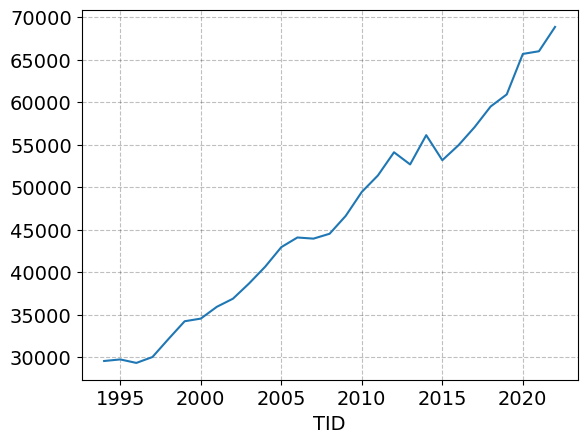

In [ ]:
#plot rents paid over time
rent_api.plot(x = 'TID', y='RENT',legend=False);

From the graph, we can see that the actual rents paid has increased steadily every year, with very few periods with no or negative growth.

In [ ]:
#plot disposable income by socioeconimic status over time.
import ipywidgets as widgets

#interactive plot
def plot_e(df, status): 
    I = df['STATUS'] == status
    ax=df.loc[I,:].plot(x='TID', y='DIS_INCOME', style='-o', legend=False)

widgets.interact(plot_e, 
    df = widgets.fixed(inc_api),
    status = widgets.Dropdown(description='Status', 
                                    options=inc_api.STATUS.unique(), 
                                    value='Students')
); 

interactive(children=(Dropdown(description='Status', options=('Students', 'Total'), value='Students'), Output(…

From the graphs we can se that the disposable income for both groups has steadily increased over the years, but at drastically different levels. Furthermore, the development of disposale income for students is less stable with a drastic drop in 08.

## 3) <a id='toc1_2_'></a>[Merge datasets](#toc0_)

Before merging, we look at the datasets to get an idea of the correct approach to join them.

In [ ]:
#check which years are in both datasets
print(f'Years in rent_api: {rent_api.TID.unique()}')
print(f'Years in inc_api = {inc_api.TID.unique()}')

diff_y = [y for y in inc_api.TID.unique() if y not in rent_api.TID.unique()] 
print(f'years in inc data, but not in rent data: {diff_y}')

Years in rent_api: [1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007
 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021
 2022]
Years in inc_api = [1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007
 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021
 2022]
years in inc data, but not in rent data: []


From this we can see that both datasets have the same years, which makes this an ideal variable to merge on. 
It is important to note though, that years are not unique in the income dataset as there are both data for students and for the total population. As such, we need to broadcast the rent data onto the income data for both groups by a many-to-one merge.   

In [ ]:
#we merge the two datasets using an inner join on time
comb = pd.merge(inc_api,rent_api, how='inner',on=['TID'])

#checking that it broadcasts correctly
comb.head(10)

,STATUS,TID,DIS_INCOME,RENT
0,Students,1994,32847,29545
1,Total,1994,108587,29545
2,Students,1995,35234,29730
3,Total,1995,113620,29730
4,Students,1996,37354,29319
5,Total,1996,118081,29319
6,Students,1997,38897,30013
7,Total,1997,122925,30013
8,Students,1998,41428,32144
9,Total,1998,128356,32144


In [ ]:
#we sort the values by status and time and then reset the index
comb.sort_values(by=['STATUS', 'TID'], inplace=True)
comb.reset_index(inplace = True, drop = True)

## 4) <a id='toc1_2_'></a>[Analysis](#toc0_)

To get a sense of how the rent and disposable income correlates, we create an index of the development for both variables (1994 =100).

In [ ]:
#index for rent
comb['R_index'] = comb.RENT/comb.RENT[0]*100

#index for disposable income
index = lambda x: x/x[0]*100
comb['I_index'] = comb.groupby('STATUS')['DIS_INCOME'].transform(lambda x: index(x.values))

comb.head(5)

,STATUS,TID,DIS_INCOME,RENT,R_index,I_index
0,Students,1994,32847,29545,100.000000,100.000000
1,Students,1995,35234,29730,100.626163,107.267026
2,Students,1996,37354,29319,99.235065,113.721192
3,Students,1997,38897,30013,101.584024,118.418729
4,Students,1998,41428,32144,108.796751,126.124151


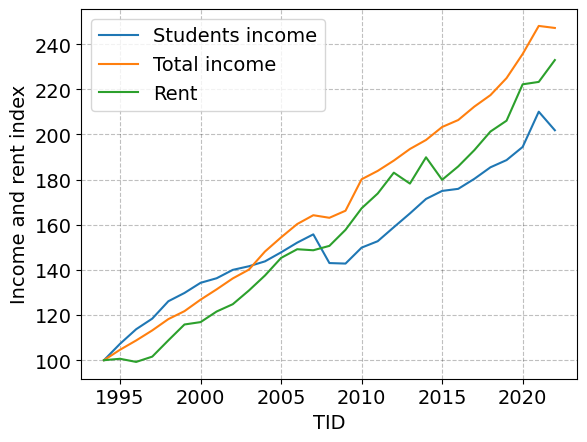

In [ ]:
#plot index
#copy of dataframe to set index
comb_=comb.copy()
comb_ = comb_.set_index('STATUS')

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# copy dataframe and resetting index
status = ["Students", "Total"]

for s in status:
    comb_.xs(s).plot(x='TID',y='I_index',ax=ax,label=s + " income")

#comb_.xs("Students").plot(x='TID',y='I_index',ax=ax,label="Income")
comb_.xs("Students").plot(x='TID',y='R_index',ax=ax,label="Rent")

ax.legend(frameon=True)
ax.set_ylabel('Income and rent index');

From the graph we can se that the development of the housing rent seems to follow the development of the disposable income of the general population fairly well. Throughout the entire period the two never diverge for long and generally follow the same trend pattern. Meanwhile, the development of the disposable income for students diverges to a greater extent from the development of the housing rent. Especially noticable is the drop in 08, which is followed by approximatly the same growth as before the drop, meaning that the dispoable income for students lack behind. Furthermore, after 2015 the gap between the rent and dispoable income for student seem to gradually increase, making it diffecult for students to keep up with rent increases.

To get a more concrete indicator of students ability to afford housing, we find the ratio of rent to income.

In [ ]:
#generating rent/income fraction (no need to group)
comb['RI_fraction'] = comb.RENT/comb.DIS_INCOME

# finding the mean of the income rent ratio for each group
RI_mean = comb.groupby(['STATUS'])['RI_fraction'].apply('mean')
RI_std = comb.groupby(['STATUS'])['RI_fraction'].apply('std')

print(f'Average rent-income ratio for each group: \n{RI_mean}')
print()
print(f'Standard deviation of rent-income ratio for each group: \n{RI_std}')


Average rent-income ratio for each group: 
STATUS
Students    0.909449
Total       0.253021
Name: RI_fraction, dtype: float64

Standard deviation of rent-income ratio for each group: 
STATUS
Students    0.089662
Total       0.006716
Name: RI_fraction, dtype: float64


From this, we can see throughout the entire period students use on average 91 pct. of their income on housing rent compared to the total population which use on average 25 pct. Furthermore, for the general population this number stays very stable with a standard deviation of 0.007, while students pct. deviates much more with a standard deviation of 0.09. 

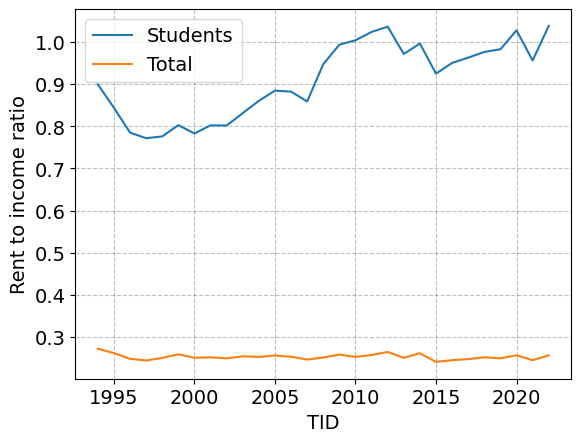

In [ ]:
#plot rent-income ratio
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

comb = comb.set_index('STATUS')

status = ["Students", "Total"]

for s in status:
    comb.xs(s).plot(x='TID',y='RI_fraction',ax=ax,label=s)

ax.legend(frameon=True)
ax.set_ylabel('Rent to income ratio');

The graph illustartes the previous points. The general population's rent income ratio is very stable and far off from dominating their consumption. Students on the other hand has experienced a trend of rent payments increasingly eating up their income even to the point where the ratio is above one meaning that students must fiance housing trough other means such as loans or taking from their savings.  

## 5) <a id='toc1_2_'></a>[Conclussion](#toc0_)

In this project we have shown, that students have always faced a hard time financing housing, but this has increased in latter years making it necessary to borrow money or decrease savings to afford housing. This highlights the importance of affordable student housing as an alternative to the general housing market.